In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as mplt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from IPython.core.interactiveshell import InteractiveShell
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
import math
import gc
import ipaddress
from urllib.parse import urlparse
from tldextract import extract
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

from data_science_utils import dataframe as df_utils
from data_science_utils import models as model_utils
from data_science_utils import plots as plot_utils
from data_science_utils.dataframe import column as column_utils

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from IPython.display import display, HTML


from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler

import lightgbm as lgb

np.set_printoptions(threshold=np.nan)




plt.rcParams["figure.figsize"] = (24,4)

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
import missingno as msno
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import datetime
from scipy import signal
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score



from sklearn import linear_model



InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_seq_items', None)
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import RobustScaler
import warnings
warnings.filterwarnings('ignore')

import sys,os
sys.path.append(os.getcwd())

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv("data/application_train.csv.zip")
df_test = pd.read_csv("data/application_test.csv.zip")

df_bb = pd.read_csv("data/bureau_balance.csv.zip")
df_b = pd.read_csv("data/bureau.csv.zip")
df_pa = pd.read_csv("data/bureau_balance.csv.zip")
df_ccb = pd.read_csv("data/credit_card_balance.csv.zip")

df_ip = pd.read_csv("data/installments_payments.csv.zip")
df_pcb = pd.read_csv("data/POS_CASH_balance.csv.zip")
df_pa = pd.read_csv("data/previous_application.csv.zip")


In [4]:
def lower_case_cols(df):
    df.columns=list(map(lambda x:x.lower(),df.columns))
    
list(map(lower_case_cols,[df,df_test,df_bb,df_b,df_pa,df_ccb,df_ip,df_pcb,df_pa]))

[None, None, None, None, None, None, None, None, None]

In [5]:
cols=df_utils.get_column_datatypes(df)
object_cols = list(cols[cols['datatype']=='object'].index)
le={}
for col in object_cols:
    #column_utils.count_distinct_values(df,col)
    le[col] = column_utils.label_encode_text_column(df,col,df_test=df_test,fillna="-1")

,Missing Values,% missing of Total Values,count,# Values as [0],datatype,skew,count,mean,std,min,25%,50%,75%,max,Most Frequent Value,Most Frequent Value Count,Most Frequent Value %
amt_annuity,12,0.003902,13672,0,float64,1.579777,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05,9000,6385,2.076348
amt_credit,0,0.000000,5603,0,float64,1.234778,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06,450000,9709,3.157285
amt_goods_price,278,0.090403,1002,0,float64,1.349000,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06,450000,26022,8.462136
amt_income_total,0,0.000000,2548,0,float64,391.559654,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08,135000,35750,11.625600
amt_req_credit_bureau_day,41519,13.501631,9,264503,float64,27.043505,265992.0,0.007000,0.110757,0.000000e+00,0.000000,0.000000,0.000000,9.000000e+00,0,264503,86.014159
amt_req_credit_bureau_hour,41519,13.501631,5,264366,float64,14.534062,265992.0,0.006402,0.083849,0.000000e+00,0.000000,0.000000,0.000000,4.000000e+00,0,264366,85.969608
amt_req_credit_bureau_mon,41519,13.501631,24,222233,float64,7.804848,265992.0,0.267395,0.916002,0.000000e+00,0.000000,0.000000,0.000000,2.700000e+01,0,222233,72.268309
amt_req_credit_bureau_qrt,41519,13.501631,11,215417,float64,134.365776,265992.0,0.265474,0.794056,0.000000e+00,0.000000,0.000000,0.000000,2.610000e+02,0,215417,70.051803
amt_req_credit_bureau_week,41519,13.501631,9,257456,float64,9.293573,265992.0,0.034362,0.204685,0.000000e+00,0.000000,0.000000,0.000000,8.000000e+00,0,257456,83.722534
amt_req_credit_bureau_year,41519,13.501631,25,71801,float64,1.243590,265992.0,1.899974,1.869295,0.000000e+00,0.000000,1.000000,3.000000,2.500000e+01,0,71801,23.349083


,Count
target,
0,282686
1,24825


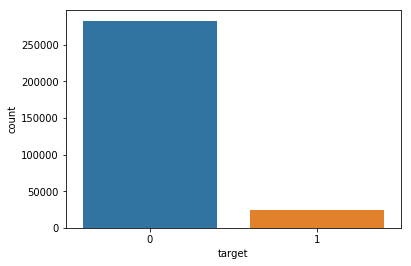

In [10]:
sns.countplot(df['target'])

df_utils.column_summaries(df)
column_utils.count_distinct_values(df,'target')

In [5]:
cols_df=df_utils.get_column_datatypes(df)
object_cols = list(cols_df[cols_df['datatype']=='object'].index)

num_cols = list(set(cols_df.index) - set(object_cols))



features = list(set(num_cols) - set(['target']))

In [100]:
xgc_cpu = XGBClassifier(max_depth=8, learning_rate=0.1,n_estimators=100,n_jobs=16,scale_pos_weight=4,missing=np.nan,gamma=16,eval_metric="auc",reg_lambda=30,reg_alpha=30)



In [62]:
X = df[features]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)

In [101]:
xgc_cpu.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eval_metric='auc', gamma=16, learning_rate=0.1,
       max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=16, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=30,
       reg_lambda=30, scale_pos_weight=4, seed=None, silent=True,
       subsample=1)

In [30]:
#xgc_gpu.fit(X_train,y_train)

In [89]:
gc.collect()

7

In [11]:

def check_auc(model,X,y):
    y_scores = model.predict_proba(X)[:,1]
    return roc_auc_score(y, y_scores)




gc.collect()


def conf_mat(model,X,y):
    y_scores = model.predict(X)
    return model_utils.confusion_matrix_frame(y,y_scores)

11

In [102]:
print("==Train==")
check_auc(xgc_cpu,X_train,y_train)
print("==Test==")
check_auc(xgc_cpu,X_test,y_test)

==Train==


0.7845648932263181

==Test==


0.7560471952462365

In [96]:
model_utils.feature_importance(xgc_cpu,df,features)

,feature,importance
35,ext_source_1,9.248055
119,ext_source_3,8.189282
19,ext_source_2,7.065687
116,days_birth,6.590320
65,amt_annuity,5.617978
80,amt_credit,4.904927
78,amt_goods_price,4.494382
83,days_id_publish,4.407952
85,days_employed,3.738116
1,days_registration,2.895419


In [97]:
def generate_results(model,df_test,features,id_col,target,file):
    dft = df_test[features]
    results = df_test[[id_col]]
    results[target] = model.predict_proba(dft)[:,1]
    results.to_csv(file,index=False,columns=results.columns)

In [103]:
generate_results(xgc_cpu,df_test,features,"sk_id_curr","target","results/results-3.csv")

In [104]:
%pwd
%cd  results

!!kaggle  competitions  submit -c home-credit-default-risk -f results-3.csv -m "Xgb base"
%cd ..

'/home/ubuntu/data-science/kaggle/home-credit-default-risk'

/home/ubuntu/data-science/kaggle/home-credit-default-risk/results


['Successfully submitted to Home Credit Default Risk']

/home/ubuntu/data-science/kaggle/home-credit-default-risk
